In [5]:
import quandl
QUANDL_API_KEY = 'BMszmHNb4_wu-dpx_x5s'
quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')

In [6]:
prices = df['Last']
volumes = df['Volume']
type(volumes)

pandas.core.series.Series

In [7]:
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [8]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2020-04-28,8.34,8.50,8.32,8.40,4619.0,39105.0
2020-04-29,8.40,8.50,8.30,8.50,8953.0,75519.0
2020-04-30,8.50,8.50,8.24,8.48,4969.0,41757.0
2020-05-04,8.48,8.48,8.14,8.30,1292.0,10754.0
2020-05-05,8.30,8.30,7.40,7.54,62250.0,476112.0


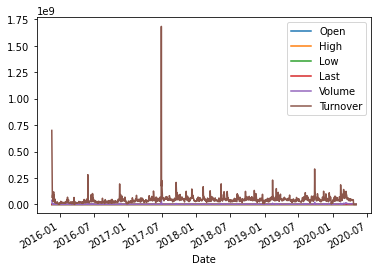

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot();

In [10]:
prices = df['Last']
volumes = df['Volume']
prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

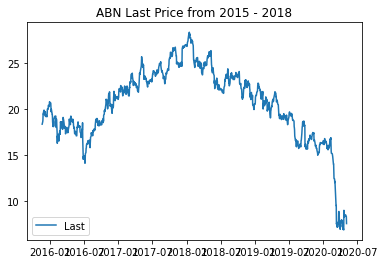

In [11]:
top = plt.subplot2grid((3,4), (0,0), rowspan = 3, colspan = 4)
top.plot(prices.index, prices, label = 'Last')
plt.title('ABN Last Price from 2015 - 2018')
plt.legend(loc=3)

In [12]:
%matplotlib inline
import quandl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


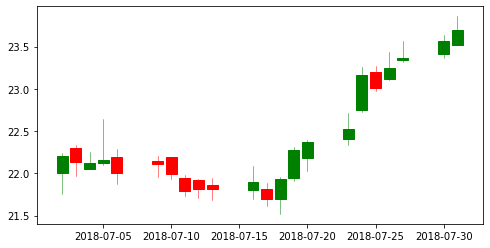

In [13]:
df_subset = quandl.get('EURONEXT/ABN', start_date = '2018-07-01', end_date = '2018-07-31')
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date', 'Open', 'High', 'Low', 'Last']]
figure, ax = plt.subplots(figsize = (8,4))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, df_ohlc.values, width=0.8, colorup = 'green', colordown = 'red')
plt.show()

In [14]:
type(plt)
type(df_subset)

pandas.core.frame.DataFrame

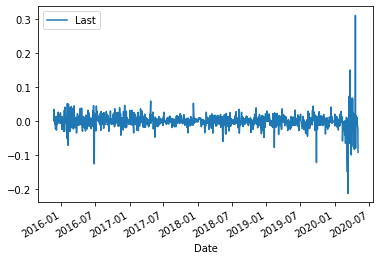

In [15]:
df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

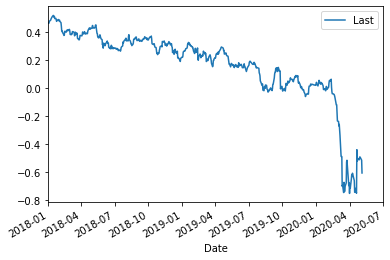

In [16]:
df_cumsum = daily_changes.cumsum()
df_cumsum.plot(xlim = ('2018-01', '2020-07'));

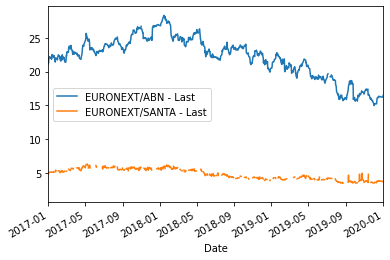

In [33]:
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'])
df.plot(xlim = ('2017', '2020'))

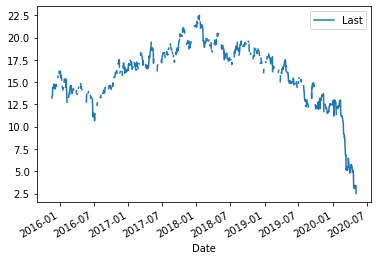

In [38]:
ABN = quandl.get('EURONEXT/ABN.4')
SANTA = quandl.get('EURONEXT/SANTA.4')
Euro_diff = ABN-SANTA
Euro_diff.plot()